In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets
import math
import matplotlib.pyplot as plt

In [2]:
mnist = read_data_sets("data", one_hot=True, reshape=False)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data\t10k-images-idx3-ubyte.gz
Extracting data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
read_data_sets

<function tensorflow.contrib.learn.python.learn.datasets.mnist.read_data_sets(train_dir, fake_data=False, one_hot=False, dtype=tf.float32, reshape=True, validation_size=5000, seed=None, source_url='https://storage.googleapis.com/cvdf-datasets/mnist/')>

In [4]:
X = tf.placeholder(tf.float32, shape=[None, 28, 28, 1])
XX = tf.reshape(X, [-1, 784])
Y = tf.placeholder(tf.float32, shape = [None, 10])

In [5]:
W1 = tf.Variable(tf.random_uniform([784, 200]))
b1 = tf.Variable(tf.random_uniform([200]))
L1 = tf.nn.sigmoid(tf.matmul(XX, W1) + b1)

W2 = tf.Variable(tf.random_normal([200,100]))
b2 = tf.Variable(tf.random_normal([100]))
L2 = tf.nn.sigmoid(tf.matmul(L1, W2) + b2)
 
W3 = tf.Variable(tf.random_normal([100,60]))
b3 = tf.Variable(tf.random_normal([60]))
L3 = tf.nn.sigmoid(tf.matmul(L2, W3) + b3)

W4 = tf.Variable(tf.random_normal([60,30]))
b4 = tf.Variable(tf.random_normal([30]))
L4 = tf.nn.sigmoid(tf.matmul(L3, W4) + b4)

W5 = tf.Variable(tf.random_normal([30,10]))
b5 = tf.Variable(tf.random_normal([10]))
L5 = tf.nn.softmax(tf.matmul(L4, W5) + b5)

H = tf.matmul(L4, W5)+b5

In [6]:
cost = tf.reduce_mean(tf.square(H - Y))

In [7]:
is_correct = tf.equal(tf.argmax(Y,1),tf.argmax(H,1))

In [8]:
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [10]:
optimizer = tf.train.AdamOptimizer(0.005)
train = optimizer.minimize(cost)

In [11]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
i_val = []
cost_val = []
accuracy_val = []

In [ ]:
for i in range(10001):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train, feed_dict={X:batch_xs, Y:batch_ys})
    if i % 1000 == 0:
        a, c, h = sess.run([accuracy, cost, H], feed_dict={X: mnist.test.images, Y: mnist.test.labels})
        print(i,"\n", a, c, "\n")
        i_val.append(i)
        cost_val.append(c)

0 
 0.0958 6.1997976 

1000 
 0.098 0.09140496 

2000 
 0.1009 0.09138855 



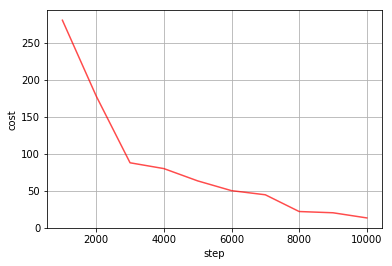

In [12]:
plt.plot(i_val[1:],cost_val[1:], c='r', alpha = 0.7)
plt.xlabel("step")
plt.ylabel("cost")
#plt.yscale('log')
plt.grid(True)

In [13]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the  appearance. Line properties and *fmt* can be mixed.
    The following two calls yield identical resu